In [74]:
import pandas as pd
import networkx as nx
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

In [2]:
df = pd.read_csv("Gowalla_totalCheckins.txt",sep="\t",header=None,parse_dates=True)
df.head(3)

,0,1,2,3,4
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637


In [3]:
df.columns = ['userid','timestamp','latitude','longitude','spotid']

In [4]:
df["timestamp"] = pd.to_datetime(df.timestamp)

In [107]:
lon_min, lat_min, lon_max, lat_max = -74.2589, 40.4774, -73.7004, 40.9176
nyc_events = df[(df['longitude']>lon_min) & 
           (df['longitude']<lon_max) & 
           (df['latitude']>lat_min) & 
           (df['latitude']<lat_max)]
nyc_events.head()


,userid,timestamp,latitude,longitude,spotid
10,0,2010-10-12 00:21:28+00:00,40.643885,-73.782806,23261
11,0,2010-10-11 20:21:20+00:00,40.741374,-73.988105,16907
12,0,2010-10-11 20:20:42+00:00,40.741388,-73.989455,12973
13,0,2010-10-11 00:06:30+00:00,40.724910,-73.994621,341255
14,0,2010-10-10 22:00:37+00:00,40.729768,-73.998535,260957


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442892 entries, 0 to 6442891
Data columns (total 5 columns):
 #   Column     Dtype              
---  ------     -----              
 0   userid     int64              
 1   timestamp  datetime64[ns, UTC]
 2   latitude   float64            
 3   longitude  float64            
 4   spotid     int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(2)
memory usage: 245.8 MB


In [109]:
G = nx.Graph()
G.add_nodes_from(nyc_events["userid"].values, bipartite=0)
G.add_nodes_from(nyc_events["spotid"].values, bipartite=1)
G.add_edges_from(nyc_events[["userid","spotid"]].values)

In [110]:
nx.is_bipartite(G)

False

In [111]:
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

In [112]:
G.nodes(data=True)

NodeDataView({0: {'bipartite': 0}, 5: {'bipartite': 0}, 8: {'bipartite': 0}, 15: {'bipartite': 0}, 16: {'bipartite': 0}, 20: {'bipartite': 0}, 21: {'bipartite': 0}, 22: {'bipartite': 0}, 27: {'bipartite': 0}, 34: {'bipartite': 0}, 35: {'bipartite': 0}, 36: {'bipartite': 0}, 39: {'bipartite': 0}, 40: {'bipartite': 0}, 41: {'bipartite': 0}, 44: {'bipartite': 0}, 52: {'bipartite': 0}, 53: {'bipartite': 0}, 54: {'bipartite': 0}, 62: {'bipartite': 0}, 71: {'bipartite': 0}, 77: {'bipartite': 0}, 78: {'bipartite': 0}, 81: {'bipartite': 0}, 84: {'bipartite': 0}, 85: {'bipartite': 0}, 88: {'bipartite': 0}, 91: {'bipartite': 0}, 92: {'bipartite': 0}, 104: {'bipartite': 0}, 106: {'bipartite': 0}, 109: {'bipartite': 0}, 111: {'bipartite': 0}, 115: {'bipartite': 0}, 123: {'bipartite': 0}, 124: {'bipartite': 0}, 128: {'bipartite': 0}, 136: {'bipartite': 0}, 141: {'bipartite': 0}, 142: {'bipartite': 0}, 143: {'bipartite': 0}, 151: {'bipartite': 0}, 158: {'bipartite': 0}, 160: {'bipartite': 0}, 175: {

In [113]:
G.edges

EdgeView([(0, 23261), (0, 16907), (0, 12973), (0, 341255), (0, 260957), (0, 1933724), (0, 105068), (0, 34817), (0, 27836), (0, 15079), (0, 22806), (0, 1365909), (0, 11844), (0, 11742), (0, 19822), (0, 15169), (0, 11794), (0, 1567837), (0, 35513), (0, 87914), (0, 16397), (0, 17710), (0, 60450), (0, 12313), (0, 34484), (5, 458146), (5, 490887), (5, 906408), (5, 84240), (5, 23261), (8, 17417), (8, 23261), (8, 164424), (8, 24785), (8, 16907), (15, 1545684), (15, 78751), (15, 11848), (15, 11844), (15, 327028), (15, 285517), (15, 11835), (15, 48524), (15, 114822), (15, 23261), (15, 12313), (15, 12973), (15, 54888), (15, 323968), (15, 1433726), (15, 11834), (15, 1471386), (15, 13022), (15, 832965), (15, 461139), (15, 156025), (15, 527937), (15, 786595), (15, 956514), (15, 422508), (15, 15079), (15, 39670), (15, 1171692), (15, 891124), (15, 25323), (15, 27278), (15, 501390), (15, 328270), (15, 11875), (15, 1441166), (16, 104462), (16, 697094), (16, 122085), (16, 52393), (16, 321012), (16, 3584

In [114]:
user1_nbh=G.neighbors(1546)

In [115]:
user1_nbh

In [116]:
user2_nbh=G.neighbors(16)

In [117]:
user2_nbh

In [118]:
print(round(bipartite.density(G, bottom_nodes), 2))

0.0


In [119]:
# get adjacency matrix
A = nx.adjacency_matrix(G)
A = A.toarray()

(1000.0, 2000.0)

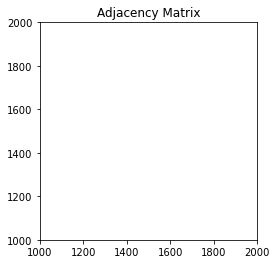

In [127]:
 # plot adjacency matrix
plt.title("Adjacency Matrix")
plt.imshow(A[6:10], cmap=None)
plt.xlim(1000,2000)
plt.ylim(1000,2000)

In [128]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [129]:
nyc_events.shape,nyc_events.userid.nunique(),nyc_events.spotid.nunique()

((138957, 6), 7115, 21509)

In [130]:
nyc_events = nyc_events.sort_values("timestamp").reset_index()

In [131]:
train = nyc_events.iloc[:int(len(nyc_events)*0.75)][["userid","spotid"]]
test = nyc_events.iloc[int(len(nyc_events)*0.75):][["userid","spotid"]]

In [132]:
len(set(train.userid).intersection(test.userid))

1067

In [133]:
train.head()

,userid,spotid
0,36070,11711
1,36070,11714
2,36070,11714
3,36070,11715
4,36070,11720


In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104217 entries, 0 to 104216
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   userid  104217 non-null  int64
 1   spotid  104217 non-null  int64
dtypes: int64(2)
memory usage: 1.6 MB


In [135]:
test.head()

,userid,spotid
104217,125327,1184549
104218,31486,1387658
104219,2798,190454
104220,2798,369064
104221,2798,883724


In [136]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34740 entries, 104217 to 138956
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   userid  34740 non-null  int64
 1   spotid  34740 non-null  int64
dtypes: int64(2)
memory usage: 542.9 KB


In [137]:
import matplotlib.pyplot as plt

In [139]:
G = nx.dodecahedral_graph()

In [144]:
draw_networkx_edges()

NameError: name 'draw_networkx_edges' is not defined

NetworkXError: random_state_index is incorrect

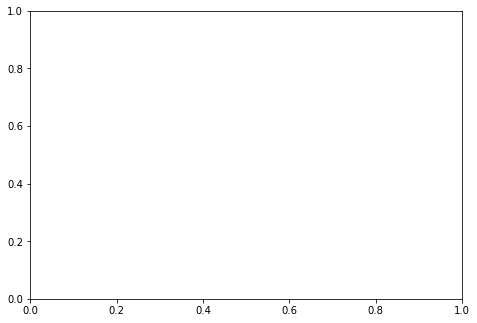

In [142]:
nx.draw() 
plt.draw()
draw_networkx()
draw_networkx_nodes()
draw_networkx_edges()
draw_networkx_labels()
draw_networkx_edge_labels()

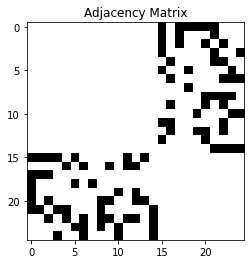

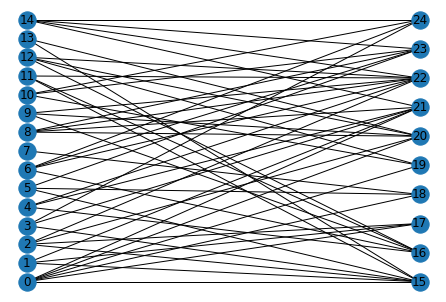

In [97]:
# create random graph
G = nx.bipartite.gnmk_random_graph(15, 10, 50, seed=123)
# get layout
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
# get adjacency matrix
A = nx.adjacency_matrix(G)
A = A.toarray()
# plot adjacency matrix
plt.title("Adjacency Matrix")
plt.imshow(A, cmap='Greys')
plt.show()
# plot graph visualisation
nx.draw(G, pos, with_labels=True)

In [98]:
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm

In [18]:
def MAP(G_test, G_pred, thres = 0):
    # calculate avePrecision for each node and its neighbors
    avePs = []
     
    # loop through every node
    for node in tqdm(G_test.nodes()):
        # get predicted edges sorted in ranking order
        rankedPredWeights = sorted(G_pred[node].items(), key=lambda x: -x[1]['weight'])
        # only include edges that exist i.e. predicted rank / weight > threshold
        rankedPred = filter(lambda x: x[1]['weight'] > thres, rankedPredWeights)
        # get the rank
        pred = [x[0] for x in rankedPred]
        # calculate rel (existence of predicted edge in the groundtruth/actual set of edges)
        # get groundtruth neighbors
        gt = set(G_test[node])
        rel = np.array([x in gt for x in pred])
        # calculate P accumulative average of precision
        predLength = len(pred)
        P = np.array([
            sum(rel[:i+1])/len(rel[:i+1]) for i in range(predLength)
        ])
        # calculate aveP
        aveP = (rel @ P)/len(gt)
        # keep track of results
        avePs.append(aveP)
    MAPvalue = sum(avePs) / len(avePs)
    print("MAP: {}".format(MAPvalue))
    return MAPvalue

In [19]:
"""
Visualise Receiver-Operating Characteristic Curve and Precision-Recall Curve
"""
def ROC_PRC(pred, G):
    # prediction score
    y_score = [p[2] for p in pred]
    # groundtruth label
    y_true = [G.has_edge(p[0], p[1]) for p in pred]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # precision-recall curve
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_true, y_score) 
    ax1.plot(fpr, tpr)
    ax1.set_title("Precision-Recall Curve")   
    # receiver-operating characteristic curve
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score) 
    ax2.plot(fpr, tpr)
    ax2.set_title("ROC Curve, AUC = {:.2f}".format(metrics.roc_auc_score(y_true, y_score)))
    
    plt.show()

In [22]:
for algo in [
    nx.resource_allocation_index,
    nx.jaccard_coefficient,
    nx.adamic_adar_index
]:
    print(algo)
    pred = list(algo(G_train))
    # create graph
    G_pred = nx.Graph()
    G_pred.add_weighted_edges_from(pred)
    # visualise adjacency matrix
    Apred = nx.adjacency_matrix(G_pred)
    Apred = Apred.toarray()
    plt.imshow(Apred, cmap='Blues')
    plt.show()
    # evaluation
    ROC_PRC(pred, G)
    MAP(G_test, G_pred)

<function resource_allocation_index at 0x0000016777DDF8B0>


NameError: name 'G_train' is not defined

In [101]:
import matplotlib.pyplot as plt
from math import isclose
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import StellarGraph, datasets
from stellargraph.data import EdgeSplitter
from collections import Counter
import multiprocessing
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split

%matplotlib inline

ModuleNotFoundError: No module named 'stellargraph'